<a href="https://colab.research.google.com/github/Mattshanevdberg/ML-FruitPunchAI_BootCamp/blob/main/5_1_ANSWERS_AutoML_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install auto-sklearn -q
!pip install openml -q
!pip install PipelineProfiler -q
!pip install H2O -q
!pip install gama -q
!pip install transformers -q
!pip install datasets -q
# restart runtime after installing

     |████████████████████████████████| 6.3 MB 24.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 722 kB 26.5 MB/s 
     |████████████████████████████████| 4.2 MB 60.8 MB/s 
     |████████████████████████████████| 4.0 MB 36.1 MB/s 
     |████████████████████████████████| 208 kB 63.0 MB/s 
     |████████████████████████████████| 973 kB 40.7 MB/s 
     |████████████████████████████████| 132 kB 52.4 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 119 

# Part 1 AutoML

We'll walk you through some extremely useful AutoML libraries. Knowing how to use that will potentially take a lot of work out of your hands. Let's start with some AutoML!

In [ ]:
# First we are going to take a look at the autosklearn library
# Restart runtime if it craches 
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import PipelineProfiler

# load the data set and split
X, y = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y, random_state=1)

### **Assignment 1**

A) Have a look at the shape of the data

B) What are the numbers suposed to mean in each instance?

C) Look up https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html 

D) Create a plot that visualises a digit

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

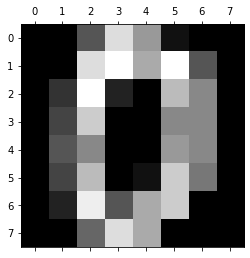

Label: 0


In [ ]:
digits = sklearn.datasets.load_digits()
print(digits.images[0])
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()
print('Label:',y[0])

Alright, now we are going to train a classifier using auto-sklearn to classify each number. Run the following code. It should take around a minute.

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=60, # sec., how long should this seed fit process run
    per_run_time_limit=15, # sec., each model may only take this long before it's killed
)

automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

Accuracy score 0.9866666666666667


Okay.... Looks cool! But how do we know now what our model looks like? And on what parameters it is tuned?

### **Assignment 2**

A) Look up in the manual how to inspect your results https://automl.github.io/auto-sklearn/master/manual.html 

B) What model perfroms best?

C) Find the parameters set for you model

D) Look up PipelineProfiler and run it to inspect your trained autoML

In [ ]:
# Print the final ensemble constructed by auto-sklearn.
print(automl.show_models())
predictions = automl.predict(X_test)
# Print statistics about the auto-sklearn run such as number of
# iterations, number of models failed with a time out.
print(automl.sprint_statistics())
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

[(0.220000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'libsvm_svc', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'classifier:libsvm_svc:C': 8776.614453785322, 'classifier:libsvm_svc:gamma': 2.6166845238639262, 'classifier:libsvm_svc:kernel': 'poly', 'classifier:libsvm_svc:max_iter': -1, 'classifier:libsvm_svc:shrinking': 'False', 'classifier:libsvm_svc:tol': 4.6482002538704e-05, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'median', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:feature_agglomeration:affinity': 'manhattan', 'feature_preprocessor:feature_agglomeration:linkage': '

In [ ]:
profiler_data= PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

### Next up we'll use the [H2O](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html ) AutoML library 

Below you find a classification example of using H2O AutoML. You can run the code to generate the results but this can take up to 30 minutes. 

In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

# The leader model is stored here
aml.leader

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpr_e9_ke8
  JVM stdout: /tmp/tmpr_e9_ke8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpr_e9_ke8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.7
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_bds91o
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_5_AutoML_1_20220107_131256

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08469572014178943
RMSE: 0.2910252912407948
LogLoss: 0.3106163519789774
Null degrees of freedom: 9999
Residual degrees of freedom: 9989
Null deviance: 13828.113387424315
Residual deviance: 6212.327039579549
AIC: 6234.327039579549
AUC: 0.9807508135820792
AUCPR: 0.9825777942887437
Gini: 0.9615016271641583

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5044680777947245: 


,,0,1,Error,Rate
0,0,4273.0,432.0,0.0918,(432.0/4705.0)
1,1,314.0,4981.0,0.0593,(314.0/5295.0)
2,Total,4587.0,5413.0,0.0746,(746.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.504468,0.930332,205.0
1,max f2,0.397284,0.956192,241.0
2,max f0point5,0.582793,0.941905,176.0
3,max accuracy,0.504468,0.925400,205.0
4,max precision,0.995037,1.000000,0.0
5,max recall,0.214485,1.000000,316.0
6,max specificity,0.995037,1.000000,0.0
7,max absolute_mcc,0.504468,0.850308,205.0
8,max min_per_class_accuracy,0.526593,0.922635,197.0
9,max mean_per_class_accuracy,0.507497,0.924465,204.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.97 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.961094,1.888574,1.888574,1.000,0.969797,1.000000,0.969797,0.018886,0.018886,88.857413,88.857413,0.018886
1,2,0.02,0.952977,1.888574,1.888574,1.000,0.957136,1.000000,0.963467,0.018886,0.037771,88.857413,88.857413,0.037771
2,3,0.03,0.944715,1.888574,1.888574,1.000,0.949159,1.000000,0.958697,0.018886,0.056657,88.857413,88.857413,0.056657
3,4,0.04,0.937715,1.888574,1.888574,1.000,0.940997,1.000000,0.954272,0.018886,0.075543,88.857413,88.857413,0.075543
4,5,0.05,0.932483,1.888574,1.888574,1.000,0.935121,1.000000,0.950442,0.018886,0.094429,88.857413,88.857413,0.094429
5,6,0.10,0.900369,1.888574,1.888574,1.000,0.916547,1.000000,0.933494,0.094429,0.188857,88.857413,88.857413,0.188857
6,7,0.15,0.871008,1.888574,1.888574,1.000,0.885362,1.000000,0.917450,0.094429,0.283286,88.857413,88.857413,0.283286
7,8,0.20,0.840440,1.884797,1.887630,0.998,0.855393,0.999500,0.901936,0.094240,0.377526,88.479698,88.762984,0.377313
8,9,0.30,0.768186,1.860246,1.878502,0.985,0.805377,0.994667,0.869750,0.186025,0.563551,86.024551,87.850173,0.560150
9,10,0.40,0.677540,1.794145,1.857413,0.950,0.725652,0.983500,0.833725,0.179415,0.742965,79.414542,85.741265,0.728937




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.18681078669480172
RMSE: 0.4322161342370293
LogLoss: 0.5506562660945903
Null degrees of freedom: 9999
Residual degrees of freedom: 9989
Null deviance: 13828.721960196306
Residual deviance: 11013.12532189181
AIC: 11035.12532189181
AUC: 0.7886368448569471
AUCPR: 0.8074041154411439
Gini: 0.5772736897138941

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3302404423659255: 


,,0,1,Error,Rate
0,0,2014.0,2691.0,0.5719,(2691.0/4705.0)
1,1,513.0,4782.0,0.0969,(513.0/5295.0)
2,Total,2527.0,7473.0,0.3204,(3204.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.330240,0.749060,280.0
1,max f2,0.165847,0.860468,348.0
2,max f0point5,0.642005,0.739591,146.0
3,max accuracy,0.546801,0.713400,186.0
4,max precision,0.984111,1.000000,0.0
5,max recall,0.056564,1.000000,389.0
6,max specificity,0.984111,1.000000,0.0
7,max absolute_mcc,0.546801,0.429073,186.0
8,max min_per_class_accuracy,0.523329,0.711583,195.0
9,max mean_per_class_accuracy,0.546801,0.714850,186.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.945921,1.869688,1.869688,0.990,0.959120,0.990000,0.959120,0.018697,0.018697,86.968839,86.968839,0.018484
1,2,0.02,0.934097,1.831917,1.850803,0.970,0.939804,0.980000,0.949462,0.018319,0.037016,83.191690,85.080264,0.036166
2,3,0.03,0.925157,1.813031,1.838212,0.960,0.929742,0.973333,0.942889,0.018130,0.055146,81.303116,83.821215,0.053446
3,4,0.04,0.915566,1.794145,1.827195,0.950,0.920021,0.967500,0.937172,0.017941,0.073088,79.414542,82.719547,0.070325
4,5,0.05,0.906642,1.813031,1.824363,0.960,0.911190,0.966000,0.931975,0.018130,0.091218,81.303116,82.436261,0.087605
5,6,0.10,0.866137,1.654391,1.739377,0.876,0.886109,0.921000,0.909042,0.082720,0.173938,65.439093,73.937677,0.157147
6,7,0.15,0.823701,1.631728,1.703494,0.864,0.845019,0.902000,0.887701,0.081586,0.255524,63.172805,70.349386,0.224281
7,8,0.20,0.785170,1.529745,1.660057,0.810,0.804308,0.879000,0.866853,0.076487,0.332011,52.974504,66.005666,0.280577
8,9,0.30,0.702005,1.395656,1.571923,0.739,0.743187,0.832333,0.825631,0.139566,0.471577,39.565628,57.192320,0.364669
9,10,0.40,0.618475,1.212465,1.482059,0.642,0.661145,0.784750,0.784509,0.121246,0.592823,21.246459,48.205855,0.409827


You'll now try this yourself on the [Combined Cycle Power Plant dataset.](https://www.kaggle.com/datasets/gova26/airpressure) The goal here is to predict the energy output (in megawatts), given the temperature, ambient pressure, relative humidity and exhaust vacuum values. In this demo, you will use H2O's AutoML to outperform the state of the art results on this task.

In [ ]:
import os 
data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/powerplant_output.csv"

# Load data into H2O
df = h2o.import_file(data_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


### **Assignment 3**

A) Use .describe() to get a sense of what the data looks like

H2O uses a different dataframe then your probably used to. H2OFrame is similar to pandas’ DataFrame, or R’s data.frame. One of the critical distinction is that the data is generally not held in memory, instead it is located on a (possibly remote) H2O cluster, and thus H2OFrame represents a mere handle to that data. Therefore you need to create specific H2) training and test frames.

B) Split your dataframe in 80% train and 20% test

C) Run H2OAutoML of your dataframe and set 'HourlyEnergyOutputMW' as target. 

D) Check the leaderboard to see what model performed best.

E) Try running the AutoML for a longer period and see if anything changes.

In [ ]:
df.describe()

Rows:9568
Cols:5




,TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
type,real,real,real,real,real
mins,1.81,25.36,992.89,25.56,420.26
mean,19.651231187290957,54.3058037207358,1013.2590781772578,73.30897784280936,454.36500940635455
maxs,37.11,81.56,1033.3,100.16,495.76
sigma,7.452473229611082,12.707892998326807,5.93878370581162,14.600268756728957,17.066994999803423
zeros,0,0,0,0,0
missing,0,0,0,0,0
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.4,1012.16,92.14,488.56


In [ ]:
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [ ]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "powerplant_lb_frame")
aml.train(y = 'HourlyEnergyOutputMW', training_frame = train, leaderboard_frame = test)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_2_20220107_132041


Model Summary: 


,,number_of_trees
0,,59.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 3.049043722038874
RMSE: 1.7461511166101502
MAE: 1.2844254301289058
RMSLE: 0.003856973556324517
Mean Residual Deviance: 3.049043722038874

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 11.631958531956162
RMSE: 3.4105657202224036
MAE: 2.471525294870484
RMSLE: 0.007486172761314591
Mean Residual Deviance: 11.631958531956162

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,2.471525,0.019663,2.489346,2.458908,2.452198,2.495856,2.461314
1,mean_residual_deviance,11.631976,0.914963,12.570468,10.556015,11.535381,12.546957,10.951060
2,mse,11.631976,0.914963,12.570468,10.556015,11.535381,12.546957,10.951060
3,r2,0.959990,0.003151,0.956804,0.964253,0.960075,0.957096,0.961720
4,residual_deviance,11.631976,0.914963,12.570468,10.556015,11.535381,12.546957,10.951060
5,rmse,3.408454,0.134231,3.545485,3.249002,3.396378,3.542168,3.309239
6,rmsle,0.007482,0.000285,0.007769,0.007148,0.007417,0.007784,0.007292



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-01-07 13:21:14,4.094 sec,0.0,454.182071,453.861607,206281.353311
1,,2022-01-07 13:21:14,4.114 sec,5.0,76.613804,76.325129,5869.674977
2,,2022-01-07 13:21:14,4.135 sec,10.0,13.622706,12.907165,185.578105
3,,2022-01-07 13:21:15,4.166 sec,15.0,4.123701,3.231729,17.004911
4,,2022-01-07 13:21:15,4.200 sec,20.0,3.051780,2.291300,9.313360
5,,2022-01-07 13:21:15,4.239 sec,25.0,2.726507,2.033951,7.433838
6,,2022-01-07 13:21:15,4.319 sec,30.0,2.447299,1.808319,5.989271
7,,2022-01-07 13:21:15,4.388 sec,35.0,2.270690,1.674315,5.156034
8,,2022-01-07 13:21:15,4.444 sec,40.0,2.154064,1.587145,4.639993
9,,2022-01-07 13:21:15,4.497 sec,45.0,2.034280,1.497311,4.138295



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TemperatureCelcius,1.747091e+06,1.000000,0.819431
1,ExhaustVacuumHg,2.955852e+05,0.169187,0.138637
2,AmbientPressureMillibar,4.944059e+04,0.028299,0.023189
3,RelativeHumidity,3.996103e+04,0.022873,0.018743


In [ ]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XGBoost_2_AutoML_2_20220107_132041,10.7227,3.27456,10.7227,2.3436,0.00722337
GBM_4_AutoML_2_20220107_132041,11.0687,3.32697,11.0687,2.35344,0.00732742
XGBoost_1_AutoML_2_20220107_132041,11.5945,3.40507,11.5945,2.41618,0.0075004
GBM_3_AutoML_2_20220107_132041,11.6705,3.41621,11.6705,2.42273,0.00752286
GBM_2_AutoML_2_20220107_132041,12.1236,3.4819,12.1236,2.50953,0.00765892
GBM_1_AutoML_2_20220107_132041,13.1112,3.62094,13.1112,2.5901,0.00796505
DRF_1_AutoML_2_20220107_132041,13.1158,3.62158,13.1158,2.59183,0.0079794
XGBoost_3_AutoML_2_20220107_132041,16.6551,4.08107,16.6551,3.0532,0.00895885
XRT_1_AutoML_2_20220107_132041,20.8924,4.57082,20.8924,3.27469,0.010057
GLM_1_AutoML_2_20220107_132041,21.0535,4.58841,21.0535,3.60491,0.0100956


### **Assignment 4**

A) Use the model you trained in exersice 3 to predict the HourlyEnergyOutputMW in your test set.

B) H2O has a function called model_perfomance to evaluate your model on test data. Use it to see how well your model predicts the test data.

In [ ]:
pred = aml.predict(test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 10.72274923536509
RMSE: 3.274560922530697
MAE: 2.3436039642705166
RMSLE: 0.007223366988087133
Mean Residual Deviance: 10.72274923536509


### **Assignment 5**

A) Take the Combined Cycle Power Plant dataset and use the SKlearn AutoML library with the same prediction goals.

B) Evaluate the difference in the resulting metrics, but more over in pipeline structure. Which is your favorite AutoML library? 